

# Project: Investigate  TMDb Movie Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am using TMDb movies dataset.
This data set contains information about 10 thousand movies collected from The Movie Database (TMDb)
It is possible that some platforms want to show movies to improve their service by showing everyone’s favorite movie, such as (recommendation system) or a production company wants to improve the level of its movies by showing the best movies to people, so I want to put some analyzes on this project for these purposes,

#### this data  consist of 21 columns such as : 
- 1.id - Unique id's for each row
- 2.imdb_id - System generated unique id
- 3.popularity - popularity score
- 4.budget - budget in dollars
- 5.revenue - revenue in dollars
- 6.original_title - Movie title
- 7.cast - cast performed in movie
- 8.homepage - website link of movie
- 9.director - director name
- 10.tagline - tagline of movie
- 11.keywords - words used to give significant idea
- 12.overview - general review of movie
- 13.runtime - movie duration in seconds
- 14.genres - categories of movie
- 15.production_companies - company name which manages a movie process from start to finish
- 16.release_date - movie releasing date
- 17.vote_count - votes given by viewers
- 18.vote_average - average votes given by viewers
- 19.release_year - movie releasing year
- 20.budget_adj-budget in 2010 dollars,accounting for inflation
- 21.revenue_adj -revenue in 2010 dollars,accounting for inflation

## Questions

- What is the most kind of movie produced?
- How many movies were produced during the years?
- What are revenue movies compared to the budget?
- What is the highest-rated film and counts votes?
- What is  the Movie title has  highest  popularity score?
- who is the director has highest average votes and popularity
- Who is the most popular actor in movies?
- relation between popularity and average votes ?





In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> I found  some  unuseful data that I do not need it to answer  the questions, and there are some missing data, and some data are incorrect numbers, so I will do the following operations

### Data Cleaning 
- keep data that related to questions and drop other
- convert  data  to its data types like (date, float ..)
- handle any data that have incorrect values like (zero) 
- drop any missing data or Duplicate data
- add (budget_adj ,revenue_adj ) to (budget,revenue)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
data = df.copy()


In [6]:
# drop unuseful data  
data.drop(['id','imdb_id','homepage','tagline','keywords','overview','runtime','production_companies'],axis = 1,inplace=True)

In [7]:
#convert data types
data['release_date']=pd.to_datetime(data['release_date'])
data['budget']=data['budget'].astype(float)
data['revenue']=data['revenue'].astype(float)
data.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [8]:
# add (budget_adj ,revenue_adj ) to (budget,revenue) in one column 
data ['budget'] = data['budget']+ data['budget_adj']
data ['revenue'] = data['revenue']+data['revenue_adj']
data.drop(['budget_adj','revenue_adj'],axis = 1 , inplace=True)
data.head()

,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year
0,32.985763,2.879999e+08,2.905975e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,2.879999e+08,7.265976e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,2.112000e+08,5.668572e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,3.839999e+08,3.970901e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,3.647999e+08,2.891998e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [9]:
# handle data that have incorrect values like (zero)
data['budget'] =data['budget'].replace(0, np.NAN)
data['revenue'] =data['revenue'].replace(0, np.NAN)

In [10]:
#drop any missing data or Duplicate data
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3849 non-null float64
budget            3849 non-null float64
revenue           3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 360.8+ KB


In [12]:
data.head(10)

,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year
0,32.985763,2.879999e+08,2.905975e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,2.879999e+08,7.265976e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,2.112000e+08,5.668572e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,3.839999e+08,3.970901e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,3.647999e+08,2.891998e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,9.110700,2.591999e+08,1.023265e+09,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,8.654359,2.975999e+08,8.459586e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,7.667400,2.073600e+08,1.143130e+09,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,7.404165,1.420800e+08,2.220923e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,6.326804,3.359999e+08,1.639120e+09,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


<a id='eda'></a>
## Exploratory Data Analysis



###  Question 1 (What is the most kind of movie produced???)

In [13]:
#  this funcatoin to take data thas many value in on record and return count of this value with counts 
# concatenate strings use (cat())  , split  it use (split()) it from (" | ") and get the most value with counts
def concatenate (col) :
    x_data = data[col].str.cat(sep = '|')
    x_data = pd.Series(x_data.split('|'))
    x_data = x_data.value_counts(ascending=False)
    
    return x_data 
    

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and finding
Kinds_of_movies = data.loc[:,['genres']]
Kinds_of_movies.head() 

,genres
0,Action|Adventure|Science Fiction|Thriller
1,Action|Adventure|Science Fiction|Thriller
2,Adventure|Science Fiction|Thriller
3,Action|Adventure|Science Fiction|Fantasy
4,Action|Crime|Thriller


In [15]:
Kinds_of_movies = concatenate('genres')


In [16]:
Kinds_of_movies

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64

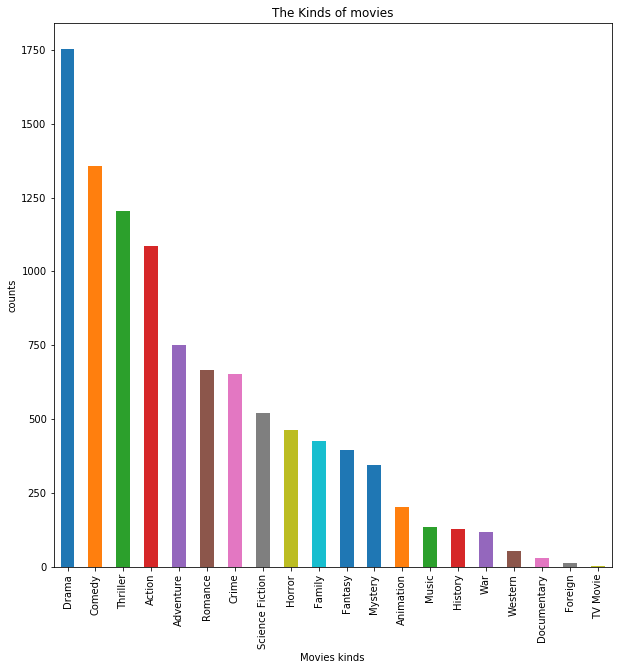

In [17]:
Kinds_of_movies.plot(kind='bar',title='The Kinds of movies',figsize=(10,10))
plt.xlabel('Movies kinds')
plt.ylabel('counts')
plt.show()

### Question 2  (How many movies were produced during the years?)

<function matplotlib.pyplot.show(*args, **kw)>

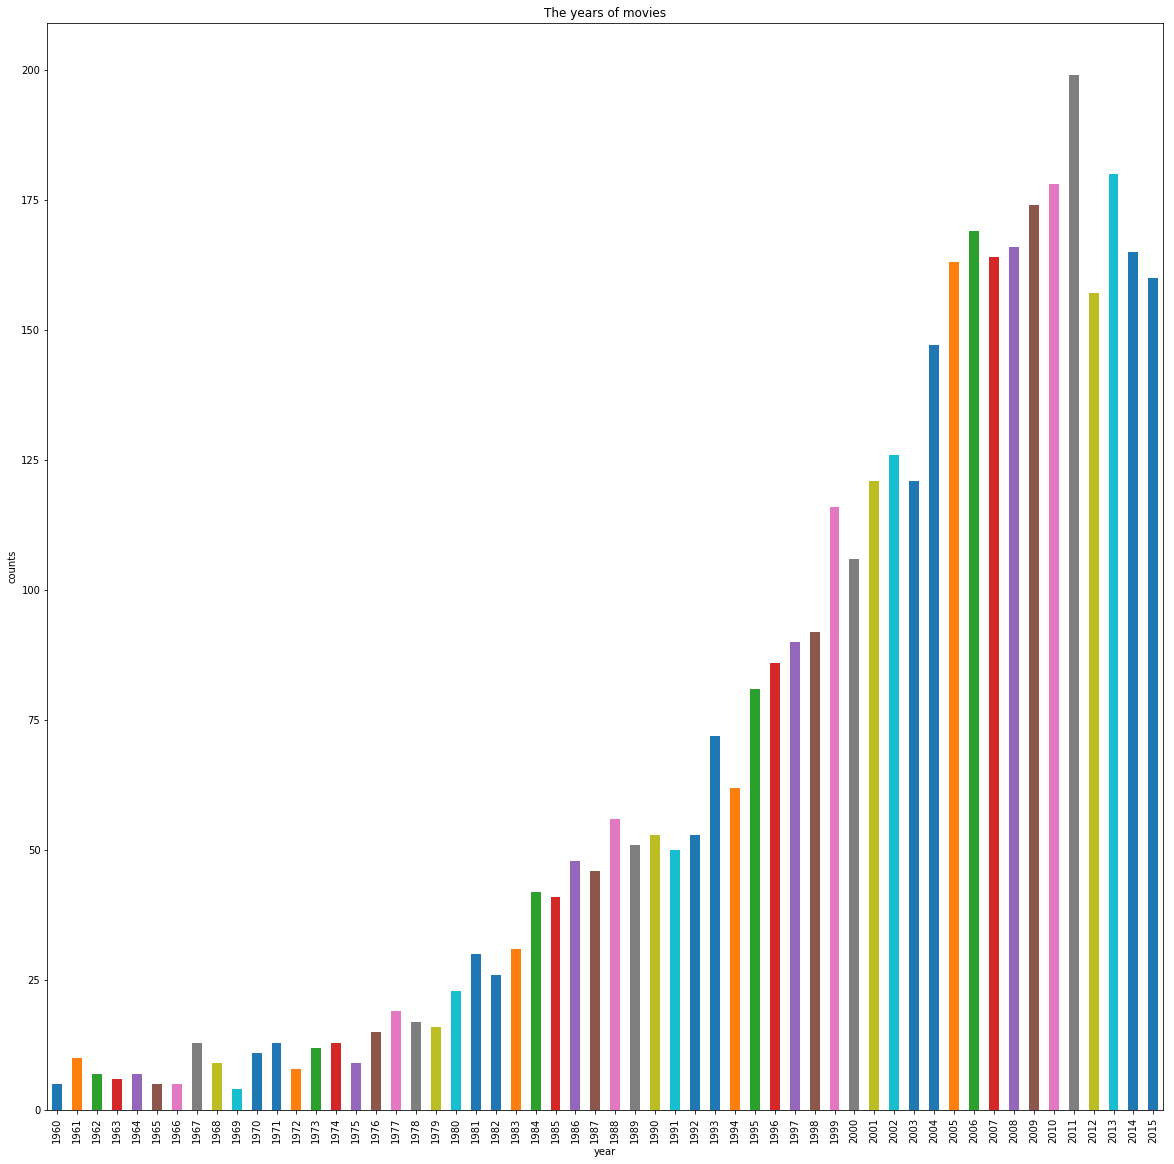

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
years = data['release_year'].value_counts().sort_index()
years.plot(kind='bar',title='The years of movies',figsize=(20,20))
plt.xlabel('year')
plt.ylabel('counts')
plt.show

### Question 3  (What are revenue movies compared to the budget??)

In [19]:
movies_profit = data.loc[:,['budget','revenue']]
movies_profit['profit'] = movies_profit['revenue'] - movies_profit['budget']
movies_profit.head()

,budget,revenue,profit
0,2.879999e+08,2.905975e+09,2.617975e+09
1,2.879999e+08,7.265976e+08,4.385977e+08
2,2.112000e+08,5.668572e+08,3.556573e+08
3,3.839999e+08,3.970901e+09,3.586901e+09
4,3.647999e+08,2.891998e+09,2.527198e+09


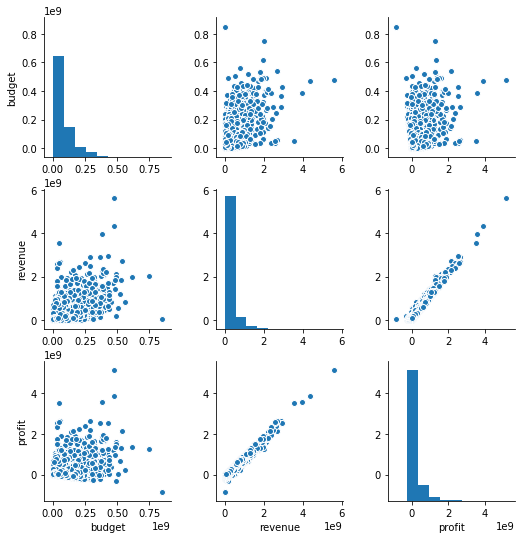

In [20]:
sns.pairplot(movies_profit)

In [21]:
# to know what is the Relations between budget,revenue and profit 
relations=movies_profit.corr()
relations

,budget,revenue,profit
budget,1.000000,0.628289,0.460372
revenue,0.628289,1.000000,0.979880
profit,0.460372,0.979880,1.000000


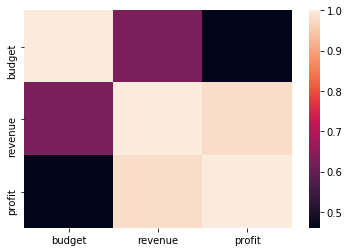

In [22]:
sns.heatmap(relations)

### Question 4  ( What is the highest-rated film and counts votes???)


In [23]:
voting = data.loc[:,['original_title','vote_count','vote_average']]
voting.head()

,original_title,vote_count,vote_average
0,Jurassic World,5562,6.5
1,Mad Max: Fury Road,6185,7.1
2,Insurgent,2480,6.3
3,Star Wars: The Force Awakens,5292,7.5
4,Furious 7,2947,7.3


In [24]:
highst_vote_movie = voting['vote_average'].idxmax()
highst_vote_movie

4178

In [25]:
voting.loc[4178]

original_title    The Shawshank Redemption
vote_count                            5754
vote_average                           8.4
Name: 4178, dtype: object

In [26]:
highst_count_vote_movie = voting['vote_count'].idxmax()
highst_count_vote_movie

1919

In [27]:
voting.loc[1919]

original_title    Inception
vote_count             9767
vote_average            7.9
Name: 1919, dtype: object


### Question 5 ( What is the Movie has highest popularity score????)

In [28]:
popularity =data.loc[:,['original_title','popularity']]
popularity.head() 

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Insurgent,13.112507
3,Star Wars: The Force Awakens,11.173104
4,Furious 7,9.335014


In [29]:
highst_popularity_movie = popularity['popularity'].idxmax()
highst_popularity_movie

0

In [30]:
popularity.loc[0]

original_title    Jurassic World
popularity               32.9858
Name: 0, dtype: object

### Question 6 (  who is the  director has highest average votes and popularity????)


In [31]:
stuff = data.loc[:,['cast','director','vote_average','popularity']]
stuff.head()


,cast,director,vote_average,popularity
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,6.5,32.985763
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,7.1,28.419936
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,6.3,13.112507
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,7.5,11.173104
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,7.3,9.335014


In [32]:
hightst_director_voting = stuff['vote_average'].idxmax()
hightst_director_popularity = stuff['popularity'].idxmax()
print (hightst_director_voting )
print(hightst_director_popularity)

4178
0


In [33]:
stuff.loc[4178] 

cast            Tim Robbins|Morgan Freeman|Bob Gunton|William ...
director                                           Frank Darabont
vote_average                                                  8.4
popularity                                                7.19204
Name: 4178, dtype: object

In [34]:
stuff.loc[0] 

cast            Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                          Colin Trevorrow
vote_average                                                  6.5
popularity                                                32.9858
Name: 0, dtype: object

### Question 7 ( Who is the most popular actor in movies??)

In [35]:
cast = concatenate('cast')
cast.head(20)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Harrison Ford         34
Brad Pitt             34
Tom Hanks             34
Morgan Freeman        34
Sylvester Stallone    34
Tom Cruise            33
Denzel Washington     32
Eddie Murphy          32
Liam Neeson           31
Julianne Moore        30
Owen Wilson           30
Meryl Streep          29
Mark Wahlberg         29
Robin Williams        29
dtype: int64

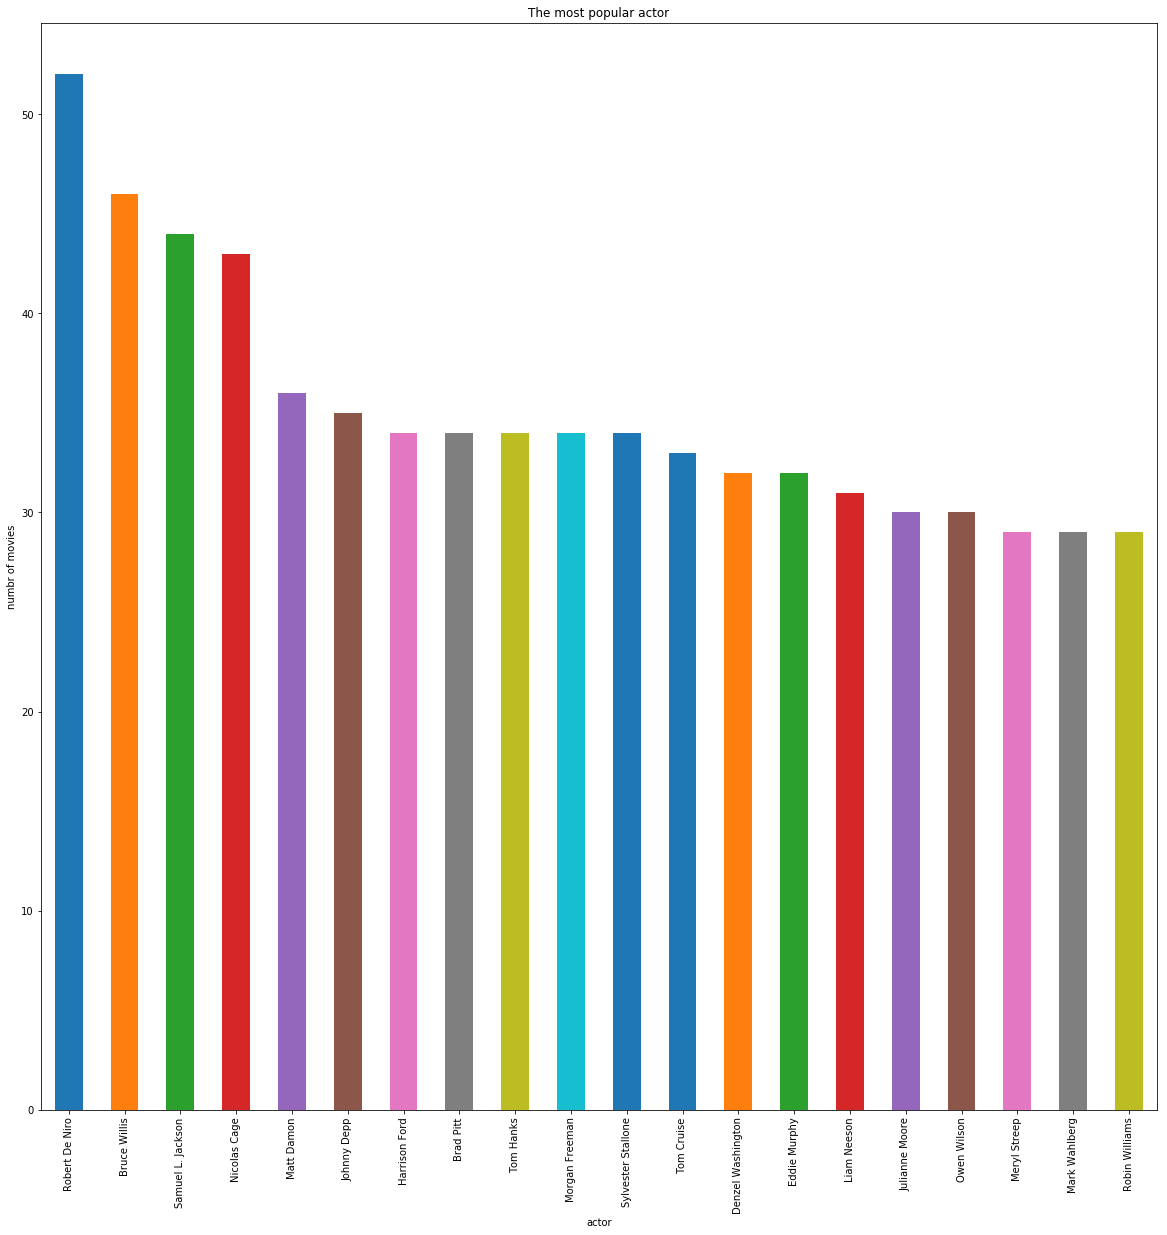

In [36]:
top = cast[:20]
top.plot(kind='bar',title='The most popular actor',figsize=(20,20))
plt.xlabel('actor')
plt.ylabel('numbr of movies')
plt.show()

### Question 8 (Relation between popularity and profit )

In [37]:
movies_profit['popularity'] = data['popularity']
movies_profit.drop(['budget','revenue'],axis=1,inplace=True)
movies_profit.head()

,profit,popularity
0,2.617975e+09,32.985763
1,4.385977e+08,28.419936
2,3.556573e+08,13.112507
3,3.586901e+09,11.173104
4,2.527198e+09,9.335014


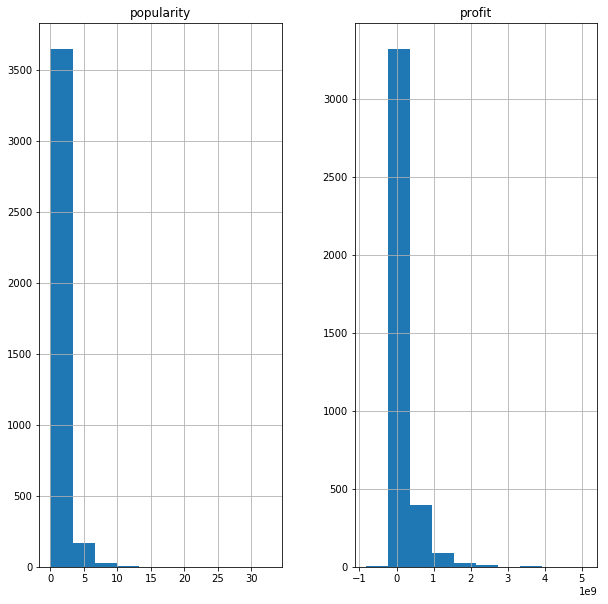

In [38]:
movies_profit.hist(figsize=(10,10));

<a id='conclusions'></a>
## Conclusions
- 1 - drama is most kind movie 
- 2 - 2011 was the most year movies were produced 
- 3 - Few of the movies lose their profits, but Most of the movies have profits and this is very noticeable
- 4 - The Shawshank Redemption is most movie has highest rated and Frank Darabont is  director 
- 5 - Inception is most movie  has counts vote 
- 6 - Jurassic World is most movie has  highest popularity and  Colin Trevorrow is  director
- 7 - Robert De Niro is popular actor in movies
- 8 - There are popular movies that do not have a high rating 

## Limitations 
 - 1- the data have many missing data and wrong data so my analysis may be Not accurate, but closer 
 - 2- data  is not enough to determine the result of profit or loss 
 - 3- Movies cannot be judged by voting because the number of votes varies from one movie to another
 - 4- The popularity of  movies is not a measure of the quality of movie or a vote on it, but it has an impact on its profits              but i donot know in this dataset correct or not

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0